## Trapezoidal Integral Approximation
- Calculate the integral to an accuracy of 10^-6

In [2]:
# Import libraries and such
import numpy as np

## Variables/Constants
a = 0
b = 2

# Define the functions that we will be using
def f(x):                                   # This is the function in question
    return np.sin(np.sqrt(100 * x)) ** 2

def traprule(f, a, b, N):                   # Old approximation function
    dx = (b-a) / N
    l = np.linspace(a, b-dx, N)             # This calculates the left endpoint x-value
    r = np.linspace(a+dx, b, N)             # This calculates the right endpoint x-value
    return np.sum( (f(l)+f(r)) * dx ) / 2

def error(N):                               # Small function for calculating the error for the table
    error = abs( traprule(f, a, b, N) - traprule(f, a, b, 10000000) )
    return error

# Print out the table
print("\n\nTable of N vs I:")
print("_______________________________________________________")
print("N       |   Integral            |   Error")
print("_______________________________________________________")
for i in range(1, 25):                      # For loop that increases N by a factor of 2 and prints out the approximation
    N = 2**i
    print(N, "\t|", traprule(f, a, b, N), "\t|", error(N))

# One final print with a super high N to get a good approximation to compare against later
print("100000000\t|", traprule(f, a, b, 100000000))



Table of N vs I:
_______________________________________________________
N       |   Integral            |   Error
_______________________________________________________
2 	| 0.7959466252916101 	| 0.20975591753378242
4 	| 0.6983700870242499 	| 0.30733245580114266
8 	| 1.0349702802038556 	| 0.02926773737846311
16 	| 0.9467001203850299 	| 0.05900242244036258
32 	| 0.9784652386787069 	| 0.02723730414668557
64 	| 0.997909669342327 	| 0.0077928734830654545
128 	| 1.0036893155876945 	| 0.0020132272376980342
256 	| 1.0051951161849217 	| 0.000507426640470765
512 	| 1.00557542778294 	| 0.00012711504245244143
1024 	| 1.0056707479021392 	| 3.179492325333655e-05
2048 	| 1.00569459308443 	| 7.949740962409635e-06
4096 	| 1.0057005553272484 	| 1.987498144062627e-06
8192 	| 1.0057020459471593 	| 4.968782332248622e-07
16384 	| 1.0057024186058376 	| 1.2421955486452418e-07
32768 	| 1.005702511770738 	| 3.10546544035617e-08
65536 	| 1.0057025350619782 	| 7.763414355821396e-09
131072 	| 1.00570254088478

## Legendre Polynomials
Make a 4x4 grid of the plots
I used the function according to the documentation found here: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


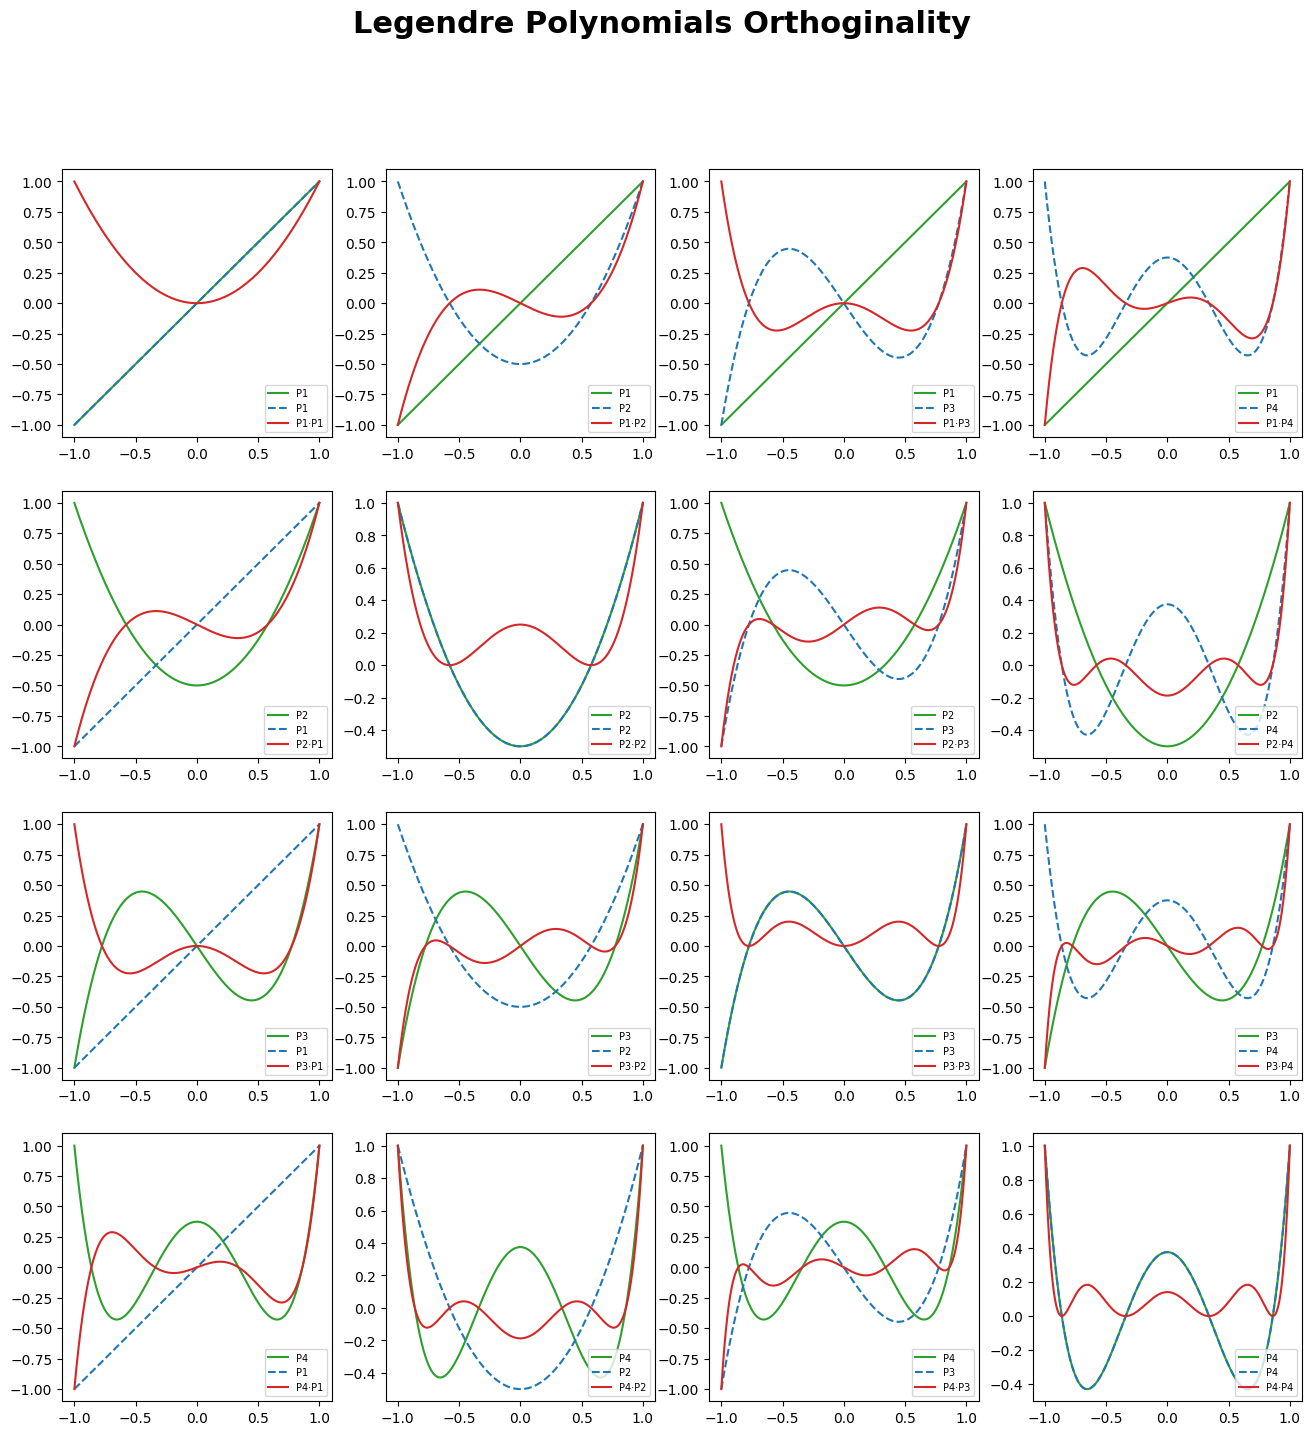

In [19]:
# First, I need to import all the librarys I will need to get the polynomials and then plot
import matplotlib.pyplot as plt
from scipy.special import legendre

# Then I need to define my "arrays" which are just my functions and the bounds
# But they will be arrays so that I can loop over an index to change the funcitons
x = np.linspace(-1, 1, 100000)
P = [legendre(1)(x), legendre(2)(x), legendre(3)(x), legendre(4)(x)]

# Here I am just following some syntax for plotting. Not much physics or math going on...
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Legendre Polynomials Orthoginality', fontsize=22, fontweight='bold')

# Here we do a loop over the i and j to form the grid
# The plot labels are for the legend and need to be increased by 1 bc i and j start at 0
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ax.plot(x, P[i], 'tab:green', label=f'P{i+1}')
        ax.plot(x, P[j], '--', label=f'P{j+1}')
        ax.plot(x, P[i]*P[j], 'tab:red', label=f'P{i+1}·P{j+1}')

        ax.legend(fontsize=7, loc='lower right')

# Save the figure so that I can put it in the markdown
plt.savefig('Legendre_Grid', dpi=300, bbox_inches='tight')
plt.show()

## Start of Gaussian Quadrature
- First, verify that the function u(x) maps [a, b] to [-1, 1]
- Next, calculate du

### Mapping
```math
u(x) = \frac{2x-a-b}{b-a}
```
Therefore, if x = a:
```math
u(a) = \frac{2a-a-b}{b-a} = -1
```
And, if x = b:
```math
u(b) = \frac{2b-b-a}{b-a} = 1
```
### du
```math
u=\frac{2x-a-b}{b-a}
```
```math
u(b-a) = (2x-a-b)
```
```math
u(b-a)+a+b = 2x
```
```math
x = \frac{u(b-a)}{2} + \frac{a+b}{2}
```
```math
dx = du * \frac{b-a}{2}
```
For this problem, [a, b] = [0,2] and therefore 
```math
dx = du
```
```math
x = u+1
```

## Develop the algorithm
```math
\int_{-1}^{1} \mathrm{d}x\, g(x) \approx \sum_{i=1}^N c_{N,i} g\left(x_{N,i}\right)
```

Where the points $`x_{N,i}`$ are the roots of the Nth order legendre polynomial, and the weights are given by the following integral:
```math
c_{i,n}=\frac{1}{P_n^{\prime}(x_{N,i})}\int_{-1}^1\frac{P_n(x)}{x-x_{N,i}} \mathrm{d}x
```

And where the function f(x) is:
```math
f(x) = \sin^2\left(\sqrt{100x}\right)
```
And the transformed integral is 
```math
g(x) = \sin^2\left(\sqrt{100(u+1)}\right)
```

In [36]:
# Import lib
import scipy as sp

# Def constants
N = 10          # N is the order of the Legendre polynomials

# Define Functions
def g(u):                                               # This is the transformed function that will allow us to be mapped over the range [-1, 1]
    return np.sin(np.sqrt(100 * (u+1))) ** 2

def algorithm(N, function):                                       # Implementing the algorithm
    roots, weights = sp.special.roots_legendre(N)       # CLUTCH! This funciton returns two arrays using ALL the N nodes. No need to loop over the function
    return np.sum(weights * function(roots))

# Print out the results of the alg
for N in [1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 2048]:
    print("The result with N =", N, "is\n", algorithm(N, g), "\n")

The result with N = 1 is
 0.591917938186608 

The result with N = 2 is
 0.04681225905124554 

The result with N = 3 is
 1.0788550677630762 

The result with N = 4 is
 1.4373009028449348 

The result with N = 8 is
 1.045246394223079 

The result with N = 16 is
 1.0057025428257274 

The result with N = 32 is
 1.0057025428257247 

The result with N = 64 is
 1.0057025428257258 

The result with N = 128 is
 1.005702542825726 

The result with N = 256 is
 1.0057025428257265 

The result with N = 2048 is
 1.0057025428257322 



## Analysis
This output matches our earlier approximation using the trapezoid rule.

 
It atcually matches out to 14 decimal places with N only equal to 16!

## Extension #1
```math
\int_0^2\mathrm{d}y\, \frac{y^2}{\sqrt{2-y}}
```

At the upper limit of integration, the integrand becomes infinite, but Gaussian quadrature points are not evaluated at the limits of integration.

This integral still converges to ($\sqrt{8192}/15$) ~> 6.033977866125206

 - How many points do you need in your Gaussian quadrature to achieve 10 digits of precision?
   - 
 - Apply the change of variable $`y=2\sin^2\theta`$. 
```math

```
 - How many Simpson's rule points do you need to calculate this to 10 significant figures?
 - Now use Gaussian quadrature to calculate the integral. How many points do you need to achieve that same precision?



In [69]:
# ~~~~~~~~~~~~  x  ~~~~~~~~~~~~
def Gauss_Integrand_OG(u):
    return (u+1)**2  /  np.sqrt(1-u)

def Gauss_Integrand_Changed(u):
    return (2*np.pi*np.sqrt(2)) * np.sin((np.pi/4)*(u+1))**5


# ~~~~~~~~~~~~  SIMPSON'S RULE  ~~~~~~~~~~~~
# ## Variables
y_plot = np.linspace(0, 2, N_Simp)       # Store the indivdual values of x to plot against

## Functions
def midpoint(f, a, b, N):
    dx = (b-a) / N
    x = np.linspace(a + dx/2, b - dx/2, N) 
    return np.sum(f(x)) * dx

def integrand(y):
    return (y**2) / np.sqrt(2-y)

def changed_integrand(theta):
    # The bounds are [0, 2] -> [0, pi/2]
    # Check out the writeup to see where the new integrand comes from
    return 8*np.sqrt(2) * ( np.sin(theta)**5 )

def Simpson(integrand, a, b, N):            # Integral on the bounds [a, b]
    I_m = midpoint(integrand, a, b, N)      # Midpoint-rule approx
    I_t = traprule(integrand, a, b, N)      # Trapezoid-rule approx
    return (2*I_m + I_t) / 3 



print("Decimal representation of integral result:\t\t", np.sqrt(8192)/15)
print("\nGaussian quadrature approximation, on the orignal\nintegral given. Result at N = 10:\t\t\t", algorithm(100000, Gauss_Integrand_OG))
print("\nSimpson's rule approximation, on the change\nof variables integral. Result at N = 25:\t\t", Simpson(changed_integrand, 0, np.pi/2, 25))
print("\nGaussian quadrature approximation, on the change\nof variables integral. Result at N = 9: \t\t", algorithm(9, Gauss_Integrand_Changed))


Decimal representation of integral result:		 6.033977866125206

Gaussian quadrature approximation, on the orignal
integral given. Result at N = 10:			 6.033925823399751

Simpson's rule approximation, on the change
of variables integral. Result at N = 25:		 6.033977866991589

Gaussian quadrature approximation, on the change
of variables integral. Result at N = 9: 		 6.033977866096075
